In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
path=f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"  
protiens=np.unique([x for x in os.listdir(path) if (("_MOUSE.csv" in x) and ("RSS_comparision_" in x))])
print(len(protiens))

data=pd.DataFrame()
for file in protiens:
    data=pd.concat([data,pd.read_csv(path+file)])
print(data.shape)

data=data.dropna()
# data.RSS_FirstThree=data.RSS_FirstThree_unnormalized

2272
(18773, 20)


In [3]:
# # data.describe()
data.columns

Index(['Protein', 'Peptied', 'charge', 'Abundance', 'RSS_compelete',
       'RSS_FirstThree', 'MAP_C', 'MAP_P', 'L1_distance_C', 'L1_distance_p',
       'sap_c', 'sap_p', 'mo', 'io_e', 'io_a1a0', 'io_a2a0', 'io_a2a1',
       'RSS_FirstThree_unnormalized', 'RMSE_first_three', 'RMSE_last_three'],
      dtype='object')

In [4]:
print("ALL",data.shape[0])
print("Abundance < 10^6",100*data[data.Abundance<1E6].shape[0]/data.shape[0])
print("Abundance < 10^7",100*data[data.Abundance<1E7].shape[0]/data.shape[0])
print("Abundance < 10^8",100*data[data.Abundance<1E8].shape[0]/data.shape[0])
print("Abundance < 10^9",100*data[data.Abundance<1E9].shape[0]/data.shape[0])
print("Abundance < 10^10",100*data[data.Abundance<1E10].shape[0]/data.shape[0])

ALL 17669
Abundance < 10^6 0.1075329673439357
Abundance < 10^7 10.023204482426848
Abundance < 10^8 58.46963608579999
Abundance < 10^9 92.46137302620409
Abundance < 10^10 99.51893146188239


In [5]:
# data=data[data.Abundance<1E7]

In [6]:
def closest(lst, K):      
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

temp=data[['mo','io_e','io_a1a0','io_a2a0','io_a2a1','Protein', 'Peptied', 'charge', 'Abundance', 'RSS_compelete','RSS_FirstThree_unnormalized',
       'RSS_FirstThree', 'MAP_C', 'MAP_P', 'L1_distance_C', 'L1_distance_p','sap_c', 'sap_p','RMSE_first_three', 'RMSE_last_three']]
temp['closest_3']=[closest(x[2:5],x[0]) for x in np.array(temp)]
temp['closest']=[closest(x[1:5],x[0]) for x in np.array(temp)]
temp["RMSE_compelete"]=temp.RSS_compelete**0.5
print(data.shape)

print(temp.shape)
temp.head(25)

(17669, 20)
(17669, 23)


,mo,io_e,io_a1a0,io_a2a0,io_a2a1,Protein,Peptied,charge,Abundance,RSS_compelete,...,MAP_P,L1_distance_C,L1_distance_p,sap_c,sap_p,RMSE_first_three,RMSE_last_three,closest_3,closest,RMSE_compelete
0,0.48532,0.466346,0.548029,0.397477,0.213934,1433B_MOUSE,DSTLImQLLR,2,1.913215e+07,0.001625,...,17.888216,0.050865,0.049368,0.722772,0.715529,0.057636,0.032832,0.548029,0.466346,0.040313
2,0.29105,0.304102,0.300866,0.302621,0.303803,1433B_MOUSE,TAFDEAIAELDTLNEESYK,2,1.747170e+07,0.000120,...,1.548643,0.006707,0.006184,0.071931,0.061946,0.007245,0.099571,0.300866,0.300866,0.010933
3,0.29105,0.312698,0.301128,0.312200,0.325854,1433B_MOUSE,TAFDEAIAELDTLNEESYK,3,2.121646e+07,0.000152,...,2.964073,0.014331,0.011767,0.151132,0.118563,0.013113,0.044557,0.301128,0.301128,0.012349
4,0.29465,0.340168,0.316772,0.328872,0.345132,1433B_MOUSE,QTTVSNSQQAYQEAFEISK,2,7.843930e+07,0.000539,...,7.023525,0.023733,0.029280,0.265989,0.280941,0.031866,0.080218,0.316772,0.316772,0.023221
5,0.27248,0.302795,0.289272,0.285017,0.279936,1433B_MOUSE,QTTVSNSQQAYQEAFEISKK,3,1.575606e+07,0.000442,...,1.980387,0.018254,0.008382,0.193653,0.079215,0.008978,0.059438,0.279936,0.279936,0.021022
0,0.48846,0.521749,0.493783,0.529043,0.547014,1433E_MOUSE,YDEMVESMK,2,2.078720e+08,0.000316,...,4.077097,0.019982,0.012852,0.205034,0.163084,0.014516,0.154646,0.493783,0.493783,0.017784
1,0.50393,0.520058,0.519567,0.518545,0.517199,1433E_MOUSE,EAAENSLVAYK,2,6.467297e+08,0.000067,...,1.844765,0.009123,0.007927,0.089179,0.073791,0.008778,0.079173,0.517199,0.517199,0.008204
2,0.49368,0.495725,0.522562,0.426604,0.309465,1433E_MOUSE,HLIPAANTGESK,2,1.933617e+08,0.000090,...,4.579985,0.011180,0.011915,0.185510,0.183199,0.014054,0.094780,0.522562,0.495725,0.009486
3,0.45163,0.337776,0.326919,0.306666,0.275569,1433E_MOUSE,YDEMVESMKK,2,1.160816e+07,0.003269,...,21.026292,0.073655,0.081186,0.824927,0.841052,0.087883,0.011462,0.326919,0.337776,0.057179
4,0.44746,0.461175,0.472116,0.450558,0.421449,1433E_MOUSE,YLAEFATGNDRK,2,2.569368e+08,0.000067,...,2.153945,0.010072,0.010557,0.087894,0.086158,0.012109,0.030218,0.450558,0.450558,0.008165


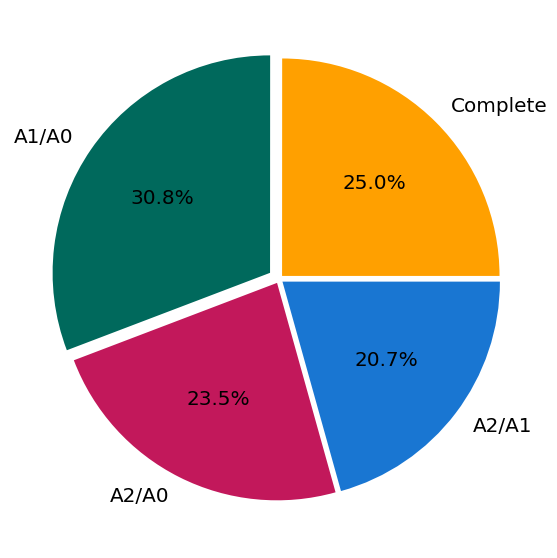

In [7]:
temp['sindex']=[list(x[1:5]).index(x[-2]) for x in np.array(temp)]
count=pd.DataFrame(temp.groupby(by='sindex')['sindex'].count())
x=np.array(count).flatten()
# =======================
plt.figure(figsize=(10,10))
plt.rc('font', size=20) 
plt.pie(x,
        labels=[f'Complete',f'A1/A0',f'A2/A0',f'A2/A1'],
        autopct='%1.1f%%',
        explode=(0.02,0.05,0.02, 0.02), 
        colors = ['#FFA000','#00695C','#C2185B', '#1976D2'])
plt.show()

In [8]:
# print(temp.shape)
print(temp[temp.RSS_compelete<temp.RSS_FirstThree].shape[0]/temp.shape[0])
# temp[temp.L1_distance_C/6<temp.L1_distance_p/3].shape[0]/temp.shape[0]
# temp[temp.sap_c/6<temp.sap_p/3].shape[0]/temp.shape[0]

0.6918331541117211


In [9]:
# temp=temp[temp["index"]==3]
# temp.RSS_FirstThree=temp.RSS_FirstThree_unnormalized

In [10]:
# data_complete.shape[0]/temp.shape[0]

In [11]:
# plt.hist(data_complete.RSS_compelete,label='Complete')
# plt.hist(data_partial.RSS_FirstThree,label=r'Partial')
# plt.legend()

12224 5445


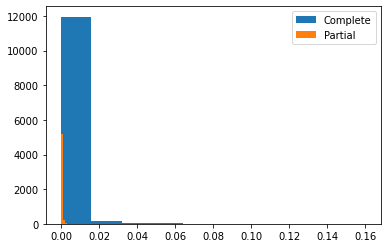

In [12]:
data_complete=temp[temp.RSS_compelete<=temp.RSS_FirstThree]
data_partial=temp[temp.RSS_compelete>temp.RSS_FirstThree]
print(data_complete.shape[0],data_partial.shape[0])
# ========================================================================
# ========================================================================
# ========================================================================

plt.rc('font', size=10) 
# sns.distplot(data_complete.RSS_compelete, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
#                  kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
#             label=r'Complete')

# sns.distplot(data_partial.RSS_FirstThree, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
#                  kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
#             label=r'Partial')
# plt.xlim([-0.001,0.01])
# plt.legend()

plt.hist(data_complete.RSS_compelete,label='Complete')
plt.hist(data_partial.RSS_FirstThree,label=r'Partial')
plt.legend()

(17669, 24) (5445, 24) 30.81668458882789


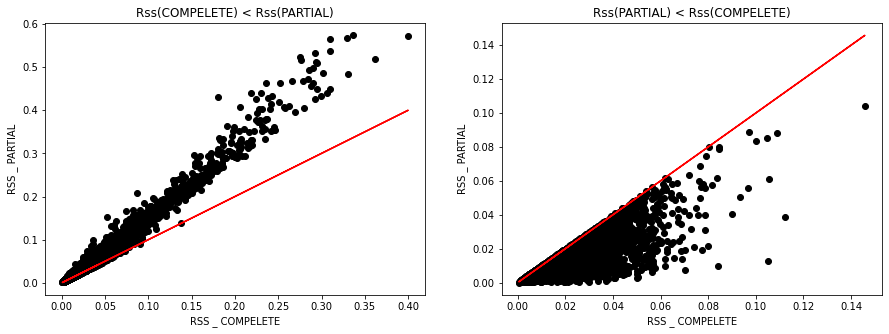

In [13]:
plt.figure(figsize=(15,5))
plt.rc('font', size=10) 
plt.subplot(1,2,1)
plt.scatter(data_complete.RSS_compelete**0.5,data_complete.RSS_FirstThree**0.5,c='k')
plt.plot(data_complete.RSS_compelete**0.5,data_complete.RSS_compelete**0.5,c='r')
plt.xlabel("RSS _ COMPELETE")
plt.ylabel("RSS _ PARTIAL")
plt.title("Rss(COMPELETE) < Rss(PARTIAL)")

plt.subplot(1,2,2)
plt.scatter(data_partial.RSS_compelete**0.5,data_partial.RSS_FirstThree**0.5,c='k')
plt.plot(data_partial.RSS_compelete**0.5,data_partial.RSS_compelete**0.5,c='r')
plt.xlabel("RSS _ COMPELETE")
plt.ylabel("RSS _ PARTIAL")
plt.title("Rss(PARTIAL) < Rss(COMPELETE)")
print(temp.shape,data_partial.shape,100*data_partial.shape[0]/temp.shape[0])
plt.show()

In [14]:
# # temp
# a1a0=temp[temp.index==1]
# a2a0=temp[temp.index==2]
# a2a1=temp[temp.index==3]
# temp[temp.RSS_compelete<0.005].shape[0]/temp.shape[0]

In [15]:
# plt.scatter(temp.mo,temp.io_e,c='k')
# plt.plot(data.mo,data.mo,c='r')
# plt.plot(data.mo,data.mo+0.1,c='m',alpha=0.8,linestyle='-.')
# plt.plot(data.mo,data.mo-0.1,c='m',alpha=0.8,linestyle='-.')

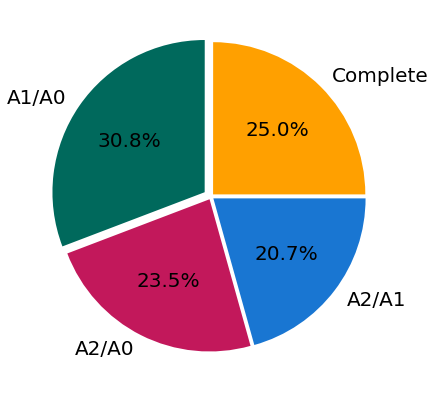

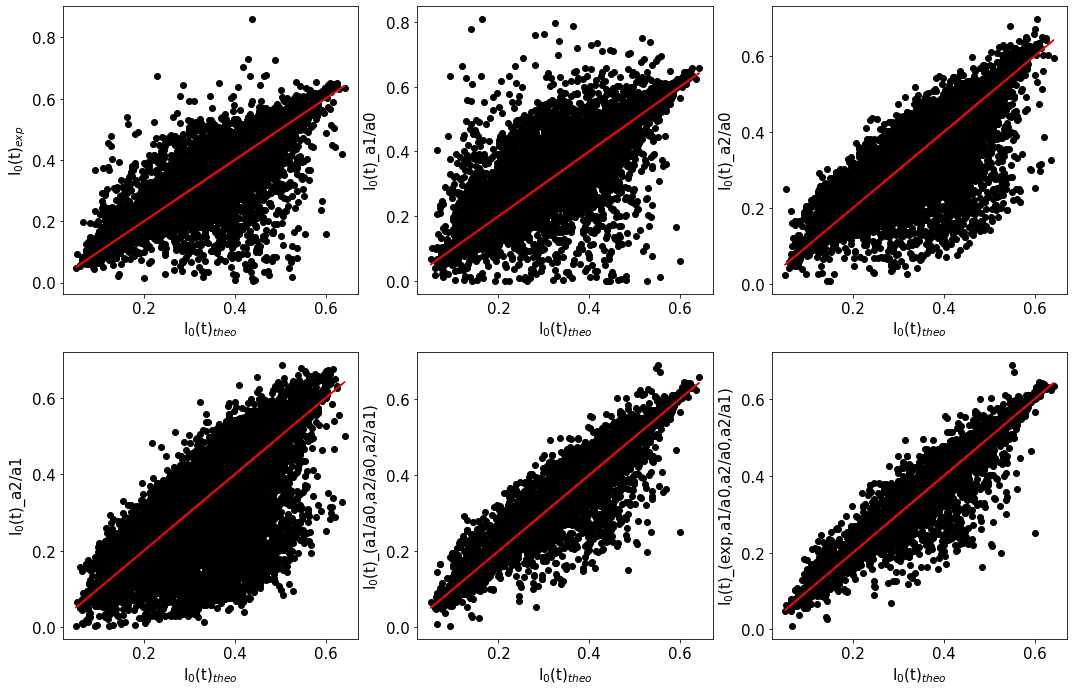

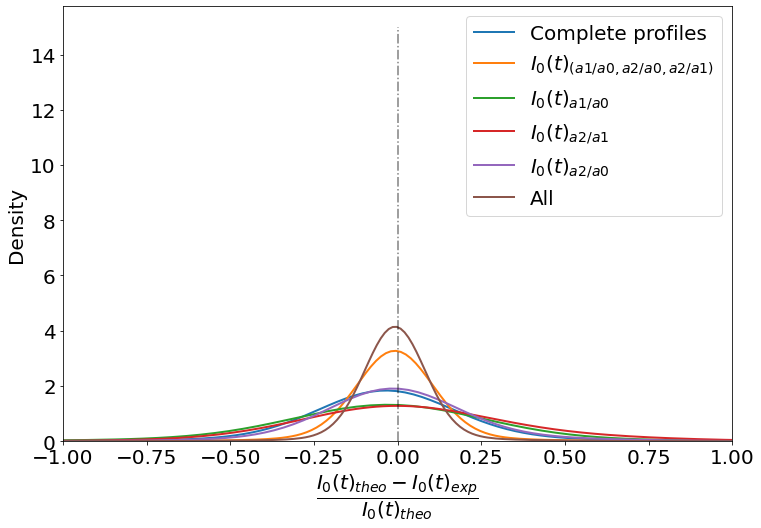

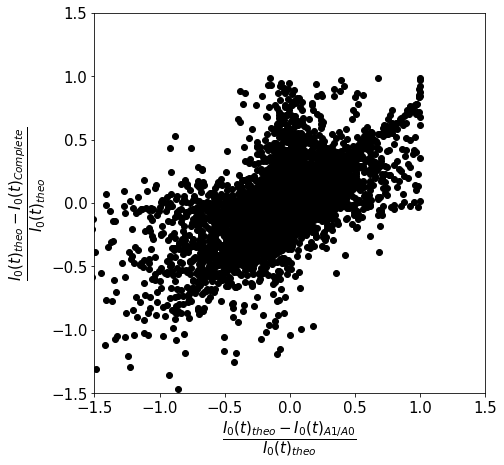

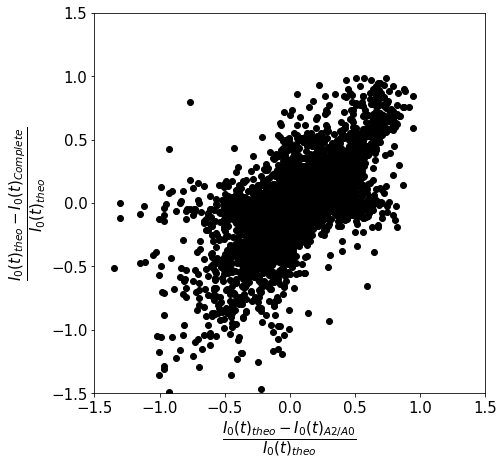

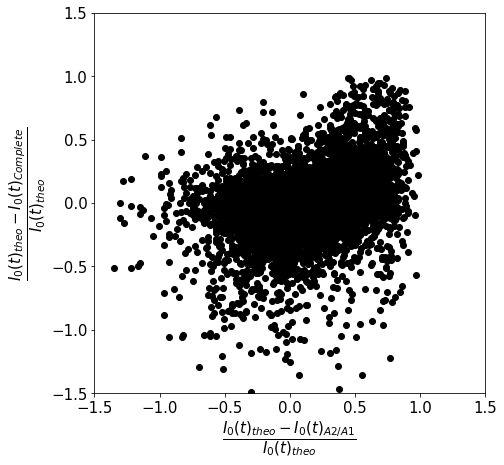

In [16]:
def plot_scatter_comparision(temp,name='test'):
    corr_vals=['0']*7
#     plt.rc('font', size=20) 
#     plt.figure(figsize=(7,7)) 

#     ////////////////////////////// pie chart
    count=pd.DataFrame(temp.groupby(by='sindex')['sindex'].count())
    x=np.array(count).flatten()
    # =======================
    plt.figure(figsize=(7,7))
    plt.rc('font', size=20) 
    plt.pie(x,
            labels=[f'Complete',f'A1/A0',f'A2/A0',f'A2/A1'],
            autopct='%1.1f%%',
            explode=(0.02,0.05,0.02, 0.02), 
            colors = ['#FFA000','#00695C','#C2185B', '#1976D2'])
    plt.savefig(name+"piechart.jpeg",dpi=900,bbox_inches='tight')
    plt.show()

#     ////////////////////////////////
    
    plt.rc('font', size=15) 
    plt.figure(figsize=(18,18)) 
    plt.subplot(3,3,1)
    plt.scatter(temp.mo,temp.io_e,c='k',label=r'R = '+corr_vals[1])
    plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'I$_0$(t)$_{theo}$')
    plt.ylabel(r'I$_0$(t)$_{exp}$') 
#     plt.savefig(name+"_I0(t)_io_e.jpeg",dpi=900,bbox_inches='tight')
#     plt.show()

#     plt.figure(figsize=(7,7)) 
    plt.subplot(3,3,2)
    plt.scatter(temp.mo,temp.io_a1a0,c='k',label=r'R = '+corr_vals[2])
    plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'I$_0$(t)$_{theo}$')
    plt.ylabel(r'I$_0$(t)_a1/a0') 
#     plt.savefig(name+"_I0(t)_io_a1a0.jpeg",dpi=900,bbox_inches='tight')
#     plt.show()

#     plt.figure(figsize=(7,7)) 
    plt.subplot(3,3,3)
    plt.scatter(temp.mo,temp.io_a2a0,c='k',label=r'R = '+corr_vals[3])
    plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'I$_0$(t)$_{theo}$')
    plt.ylabel(r'I$_0$(t)_a2/a0') 
#     plt.savefig(name+"_I0(t)_io_a2a0.jpeg",dpi=900,bbox_inches='tight')
#     plt.show()

#     plt.figure(figsize=(7,7)) 
    plt.subplot(3,3,4)
    plt.scatter(temp.mo,temp.io_a2a1,c='k',label=r'R = '+corr_vals[4])
    plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'I$_0$(t)$_{theo}$')
    plt.ylabel(r'I$_0$(t)_a2/a1') 
#     plt.savefig(name+"_I0(t)_io_a2a1.jpeg",dpi=900,bbox_inches='tight')
#     plt.show()

#     plt.figure(figsize=(7,7)) 
    plt.subplot(3,3,5)
    plt.scatter(temp.mo,temp.closest_3,c='k',label=r'R = '+corr_vals[5])
    plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'I$_0$(t)$_{theo}$') 
    plt.ylabel(r'I$_0$(t)_(a1/a0,a2/a0,a2/a1)') 
#     plt.savefig(name+"_I0(t)_closest_3.jpeg",dpi=900,bbox_inches='tight')
#     plt.show()

#     plt.figure(figsize=(7,7)) 
    plt.subplot(3,3,6)
    plt.scatter(temp.mo,temp.closest,c='k',label=r'R = '+corr_vals[6])
    plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'I$_0$(t)$_{theo}$') 
    plt.ylabel(r'I$_0$(t)_(exp,a1/a0,a2/a0,a2/a1)') 
#     plt.savefig(name+"_I0(t)_closest.jpeg",dpi=900,bbox_inches='tight')
    plt.savefig(name+"scatterPlot.jpeg",dpi=900,bbox_inches='tight')
    
    plt.figure(figsize=(12,8))
    plt.rc('font', size=20) 
    plt.xlim((-2, 2))  
    sns.distplot((temp.mo-temp.io_e)/temp.mo, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                     kde_kws = {'shade': False, 'linewidth': 2,'bw':1} ,
                label=r"Complete profiles")
    sns.distplot((temp.mo-temp.closest_3)/temp.mo, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                     kde_kws = {'shade': False, 'linewidth': 2,'bw':1} ,
                label=r'$I_0(t)_{(a1/a0,a2/a0,a2/a1)}$')

    sns.distplot((temp.mo-temp.io_a1a0)/temp.mo, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                     kde_kws = {'shade': False, 'linewidth': 2,'bw':1} ,
                label=r'$I_0(t)_{a1/a0}$')

    sns.distplot((temp.mo-temp.io_a2a1)/temp.mo, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                     kde_kws = {'shade': False, 'linewidth': 2,'bw':1} ,
                label=r'$I_0(t)_{a2/a1}$')

    sns.distplot((temp.mo-temp.io_a2a0)/temp.mo, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                     kde_kws = {'shade': False, 'linewidth': 2,'bw':1} ,
                label=r'$I_0(t)_{a2/a0}$')
    sns.distplot((temp.mo-temp.closest)/temp.mo, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                     kde_kws = {'shade': False, 'linewidth': 2,'bw':1} ,
                label=r'All')

    plt.vlines(x=0,ymin=0,ymax=15,color='k',alpha=0.5,linestyle='-.')
    plt.xlim([-0.75,0.75])
    plt.xlabel(r'$\dfrac{ {I_0(t)_{theo}}-{I_0(t)_{exp}} }{I_0(t)_{theo}}$')
    plt.legend(loc='upper right')
    plt.xlim([-1,1])    
    plt.savefig(name+"_densityPlot.jpeg",dpi=900,bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(7,7))     
    plt.rc('font', size=15) 
    plt.scatter( (temp.mo-temp.io_a1a0)/temp.mo,(temp.mo-temp.io_e)/temp.mo,c='k',label=r'R = '+corr_vals[1])
#     plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'$\dfrac{ {I_0(t)_{theo}}-{I_0(t)_{A1/A0}} }{I_0(t)_{theo}}$')
    plt.ylabel(r'$\dfrac{ {I_0(t)_{theo}}-{I_0(t)_{Complete}} }{I_0(t)_{theo}}$')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])    
    plt.savefig(name+"_percentageDiffScatterPlot_A1A0.jpeg",dpi=900,bbox_inches='tight')
    
    
    
    
    plt.figure(figsize=(7,7))     
    plt.rc('font', size=15) 
    plt.scatter( (temp.mo-temp.io_a2a0)/temp.mo,(temp.mo-temp.io_e)/temp.mo,c='k',label=r'R = '+corr_vals[1])
#     plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'$\dfrac{ {I_0(t)_{theo}}-{I_0(t)_{A2/A0}} }{I_0(t)_{theo}}$')
    plt.ylabel(r'$\dfrac{ {I_0(t)_{theo}}-{I_0(t)_{Complete}} }{I_0(t)_{theo}}$')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])    
    plt.savefig(name+"_percentageDiffScatterPlot_A2A0.jpeg",dpi=900,bbox_inches='tight')
    
    
    
    
    plt.figure(figsize=(7,7))     
    plt.rc('font', size=15) 
    plt.scatter( (temp.mo-temp.io_a2a1)/temp.mo,(temp.mo-temp.io_e)/temp.mo,c='k',label=r'R = '+corr_vals[1])
#     plt.plot(data.mo,data.mo,c='r')
    plt.xlabel(r'$\dfrac{ {I_0(t)_{theo}}-{I_0(t)_{A2/A1}} }{I_0(t)_{theo}}$')
    plt.ylabel(r'$\dfrac{ {I_0(t)_{theo}}-{I_0(t)_{Complete}} }{I_0(t)_{theo}}$')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])    
    plt.savefig(name+"_percentageDiffScatterPlot_A2A1.jpeg",dpi=900,bbox_inches='tight')
    

    
plot_scatter_comparision(temp)

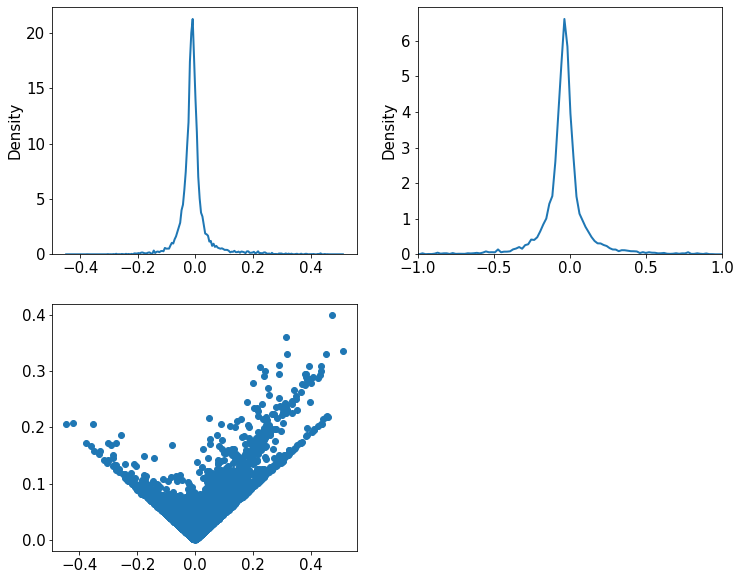

In [17]:
plt.figure(figsize=(12,10)) 
plt.subplot(2,2,1)
sns.distplot(temp.mo-temp.io_e, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                 kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
            label=r'Complete')
plt.subplot(2,2,2)
sns.distplot((temp.mo-temp.io_e)/temp.mo, hist = False,bins=25, kde = True,hist_kws={'edgecolor':'black'},
                 kde_kws = {'shade': False, 'linewidth': 2,'bw_adjust':0.1} ,
            label=r'Complete')
plt.xlim([-1,1])

plt.subplot(2,2,3)
plt.scatter(temp.mo-temp.io_e,temp.RSS_compelete**0.5)

In [18]:
# males = [19, 22, 16, 29, 24,78,10,12]
# females = [20, 11, 17, 12]
# from scipy.stats import mannwhitneyu
# U1, p = mannwhitneyu(males, females, method="exact")
# print(U1,p)

In [19]:
# 100*temp[temp.RSS_compelete**0.5<0.01].shape[0]/temp.shape[0]

In [20]:
100*temp[temp.RMSE_compelete<0.01].shape[0]/temp.shape[0]


30.629916803441056

5412 17669 30.629916803441056


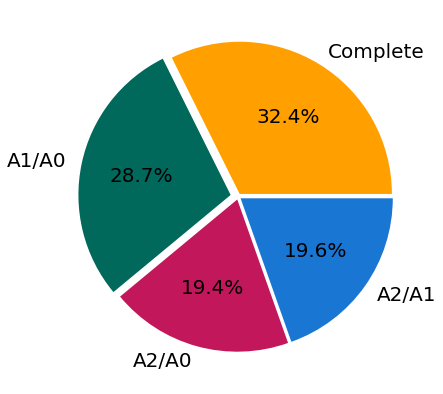

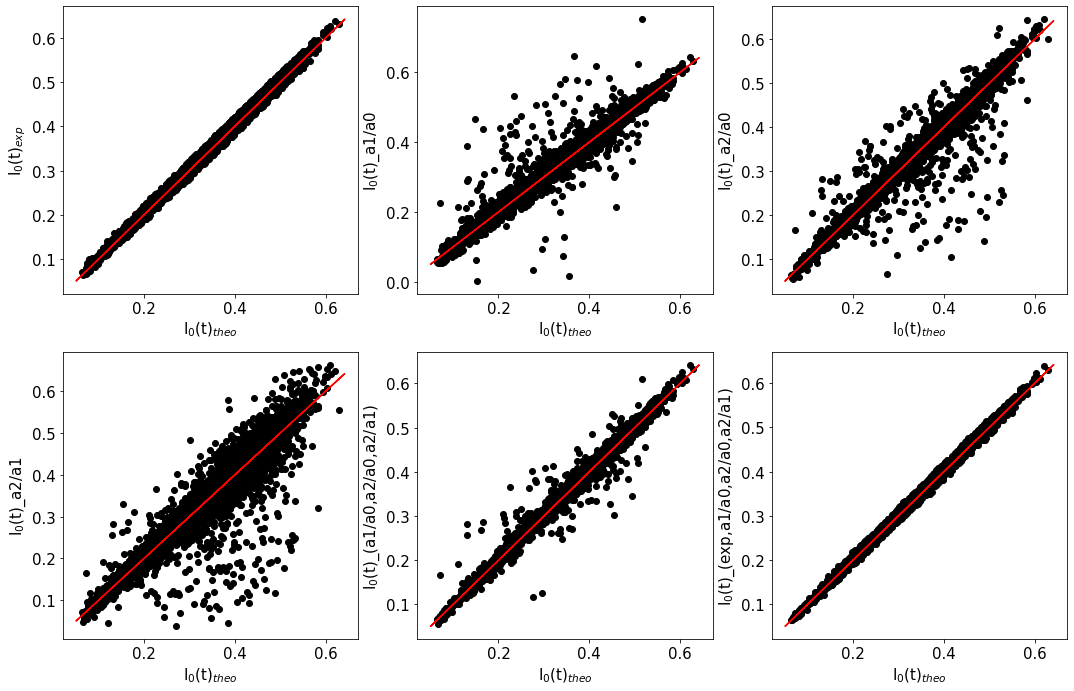

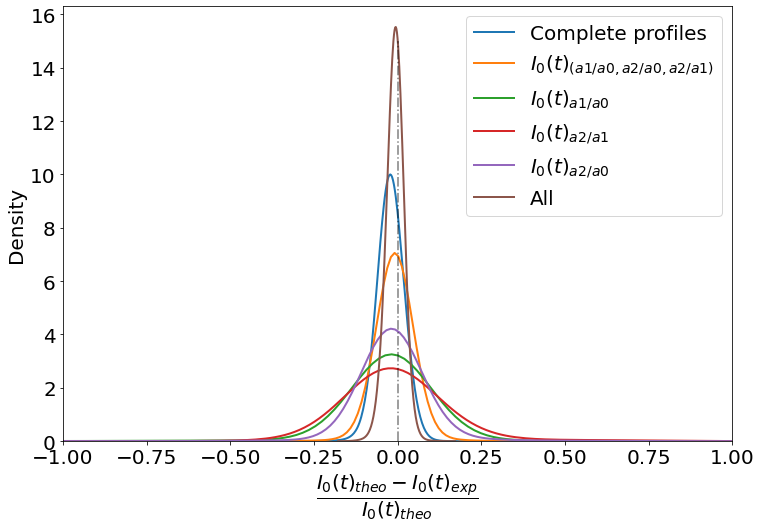

In [ ]:
c_th=0.01
# count=pd.DataFrame(temp[(temp.RMSE_compelete<c_th)  ].groupby(by='sindex')['sindex'].count())
# x=np.array(count).flatten()
# # =======================
# plt.figure(figsize=(7,7))
# plt.rc('font', size=20) 
# plt.pie(x,
#         labels=[f'Complete',f'A1/A0',f'A2/A0',f'A2/A1'],
#         autopct='%1.1f%%',
#         explode=(0.02,0.05,0.02, 0.02), 
#         colors = ['#FFA000','#00695C','#C2185B', '#1976D2'])
# plt.show()

print(temp[(temp.RMSE_compelete<c_th) ].shape[0],temp.shape[0],100*temp[(temp.RMSE_compelete<c_th) ].shape[0]/temp.shape[0])

plot_scatter_comparision(temp[(temp.RMSE_compelete<c_th) ],"RMSE_compelete_lessThan_0.01")

In [ ]:
filtered_data=temp[ abs(temp.mo-temp.io_e)/temp.mo <0.1*temp.mo] 
# filtered_data=temp[ abs(temp.mo-temp.closest)/temp.mo <0.1*temp.mo] 

count=pd.DataFrame(filtered_data.groupby(by='sindex')['sindex'].count())

x=np.array(count).flatten()
# =======================
plt.figure(figsize=(7,7))
plt.rc('font', size=20) 
plt.pie(x,
        labels=[f'Complete',f'A1/A0',f'A2/A0',f'A2/A1'],
        autopct='%1.1f%%',
        explode=(0.02,0.05,0.02, 0.02), 
        colors = ['#FFA000','#00695C','#C2185B', '#1976D2'])
plt.show()

print(filtered_data.shape[0],temp.shape[0],100*filtered_data.shape[0]/temp.shape[0])

plot_scatter_comparision(filtered_data,"I0_t_lessThan_0.1_Theoretical)")

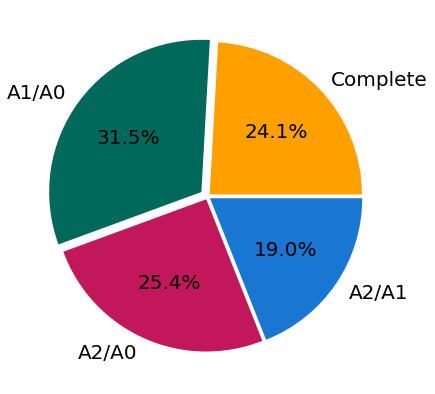

11168 17669 63.20674627879337


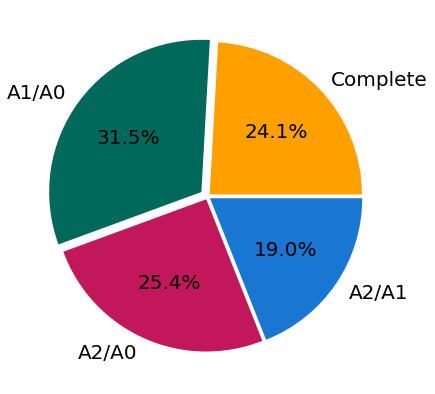

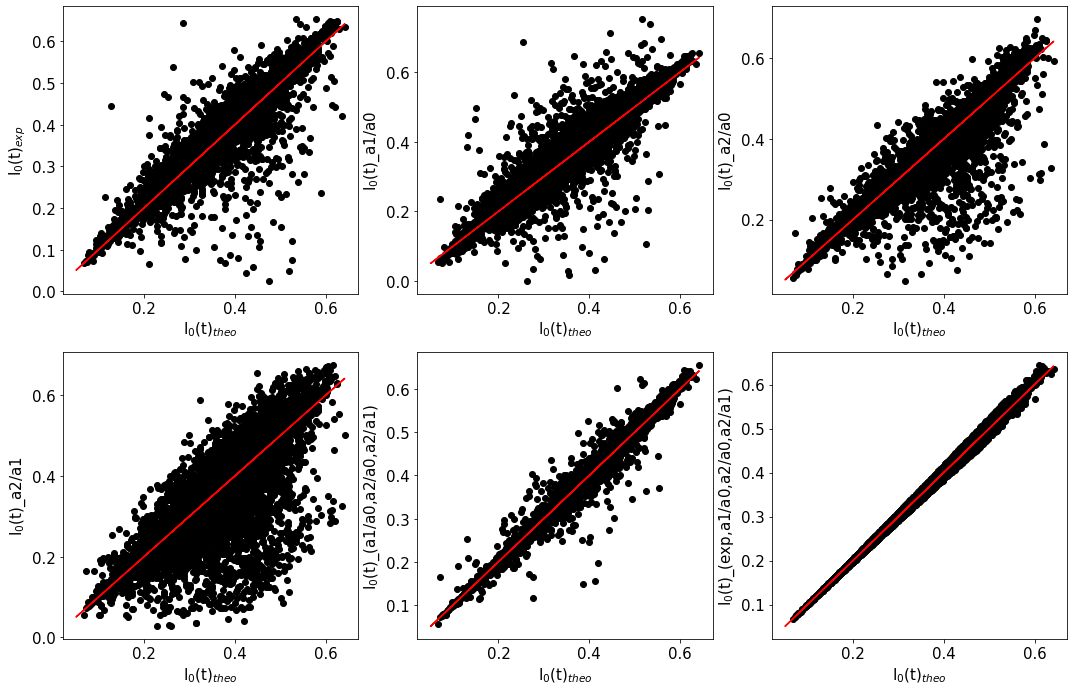

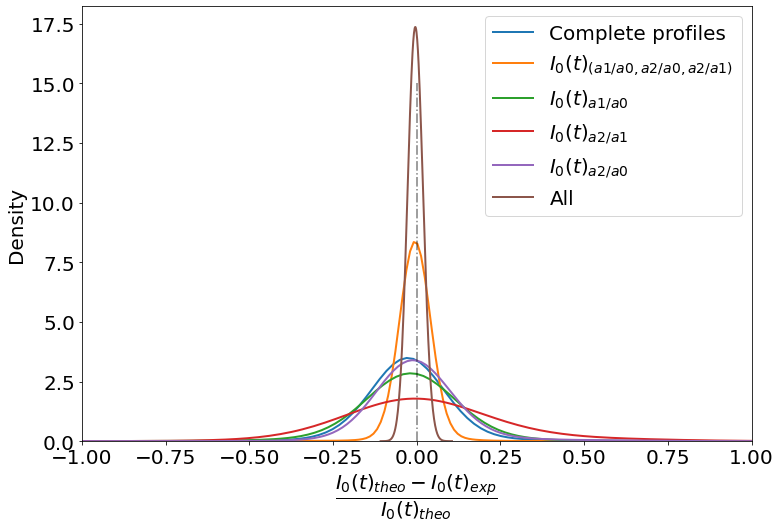

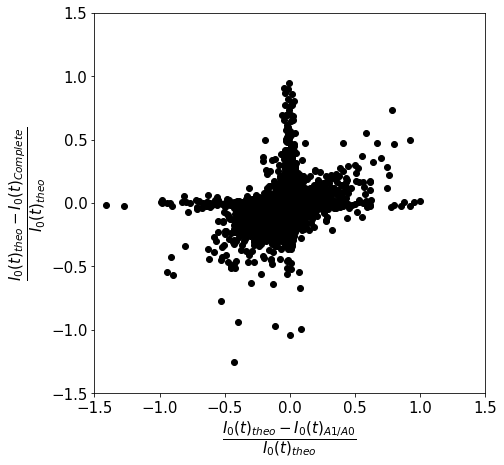

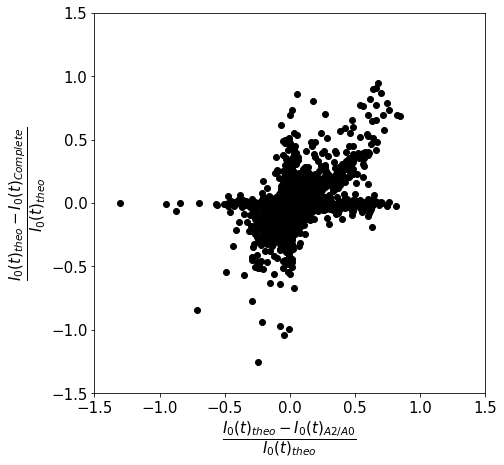

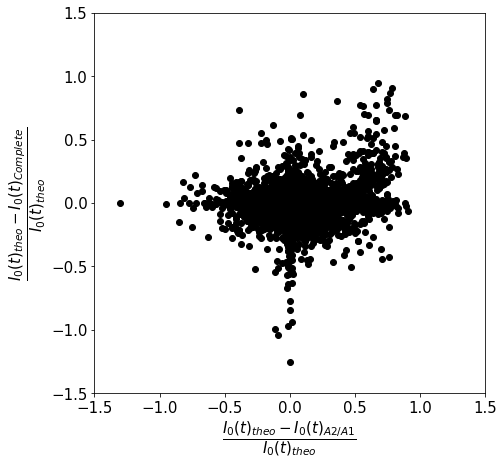

In [23]:
# filtered_data=temp[ abs(temp.mo-temp.io_e)/temp.mo <0.1*temp.mo] 
filtered_data=temp[ abs(temp.mo-temp.closest)/temp.mo <0.1*temp.mo] 

count=pd.DataFrame(filtered_data.groupby(by='sindex')['sindex'].count())

x=np.array(count).flatten()
# =======================
plt.figure(figsize=(7,7))
plt.rc('font', size=20) 
plt.pie(x,
        labels=[f'Complete',f'A1/A0',f'A2/A0',f'A2/A1'],
        autopct='%1.1f%%',
        explode=(0.02,0.05,0.02, 0.02), 
        colors = ['#FFA000','#00695C','#C2185B', '#1976D2'])
plt.show()

print(filtered_data.shape[0],temp.shape[0],100*filtered_data.shape[0]/temp.shape[0])

plot_scatter_comparision(filtered_data,"I0_t_selectedFromFour_lessThan_0.1_Theoretical)")

In [38]:
print("Complete",filtered_data[(abs(filtered_data.mo-filtered_data.io_e)/filtered_data.mo < 0.1*filtered_data.mo)].shape[0])
print(filtered_data[(abs(filtered_data.mo-filtered_data.io_e)/filtered_data.mo > 0.1*filtered_data.mo)].shape)
print(filtered_data[(abs(filtered_data.mo-filtered_data.closest)/filtered_data.mo < 0.1*filtered_data.mo)].shape)
print(filtered_data.shape[0])

Complete 5632
(5536, 24)
(11168, 24)
11168


In [35]:
# filtered_data[(filtered_data.mo-filtered_data.io_e)/filtered_data.mo > 0.5]
th=0.1
print("A1/A0",filtered_data[ (abs(filtered_data.mo-filtered_data.io_e)/filtered_data.mo >= th*filtered_data.mo) &
              (abs(filtered_data.mo-filtered_data.io_a1a0)/filtered_data.mo < th*filtered_data.mo)].shape[0])

print("A2/A0",filtered_data[ (abs(filtered_data.mo-filtered_data.io_e)/filtered_data.mo >= th*filtered_data.mo) &
              (abs(filtered_data.mo-filtered_data.io_a2a0)/filtered_data.mo < th*filtered_data.mo)].shape[0])

print("A2/A1",filtered_data[ (abs(filtered_data.mo-filtered_data.io_e)/filtered_data.mo >= th*filtered_data.mo) &
              (abs(filtered_data.mo-filtered_data.io_a2a1)/filtered_data.mo < th*filtered_data.mo)].shape[0])

A1/A0 2670
A2/A0 2986
A2/A1 1959


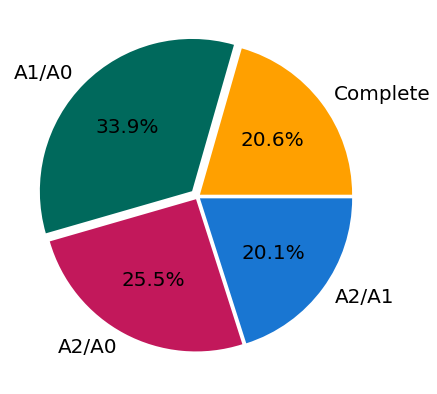

4946 17669 27.992529288584528


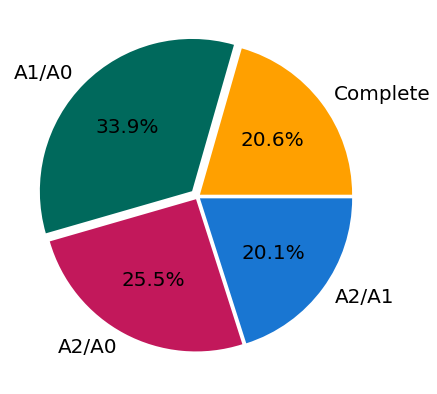

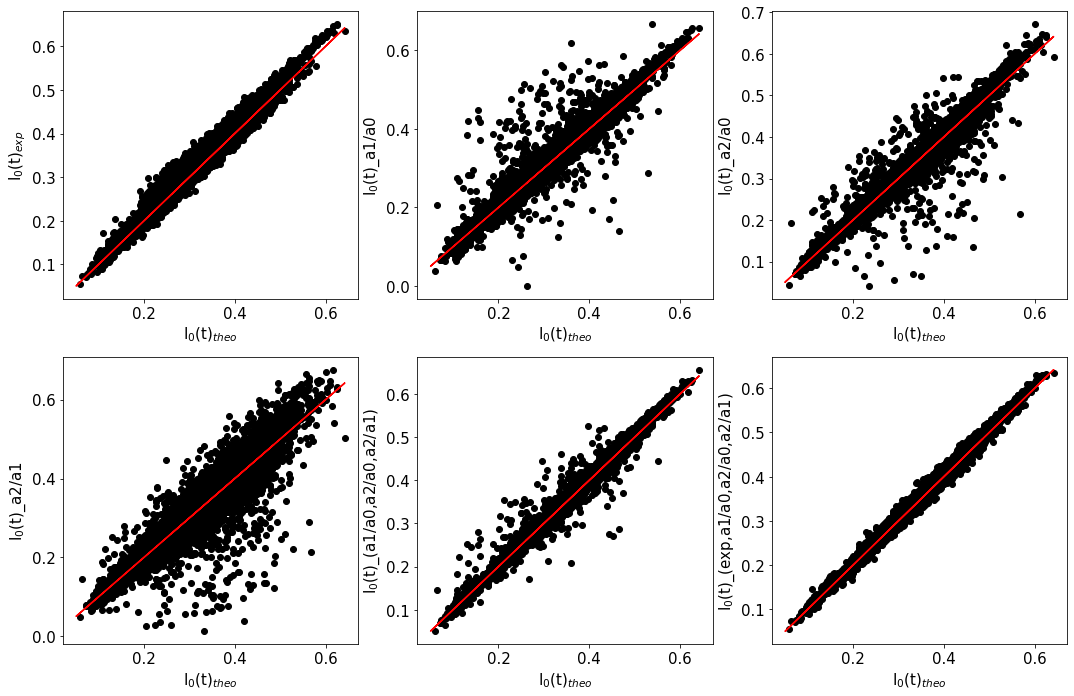

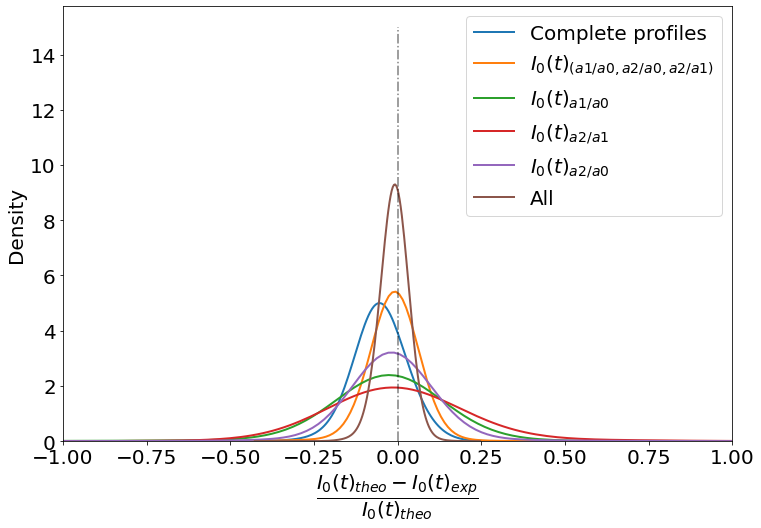

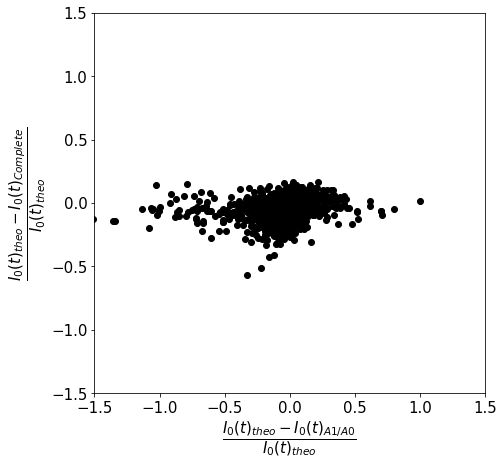

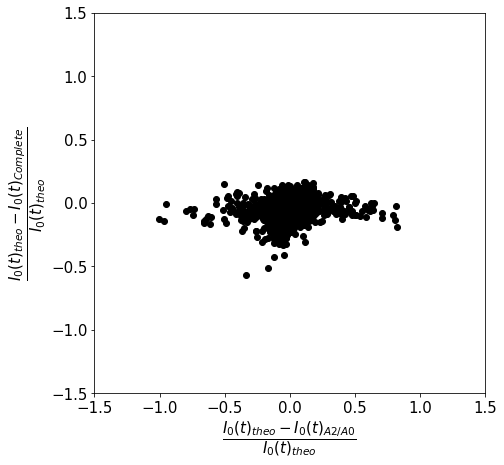

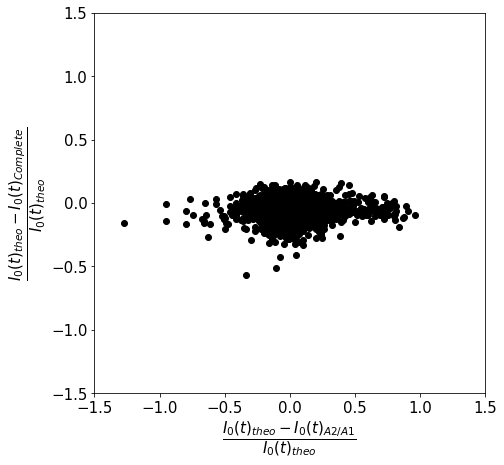

In [26]:
c_th=0.01
p_th=0.02

count=pd.DataFrame(temp[(temp.RMSE_compelete>c_th) &  
                        (temp.RMSE_first_three<p_th) ].groupby(by='sindex')['sindex'].count())
x=np.array(count).flatten()
# =======================
plt.figure(figsize=(7,7))
plt.rc('font', size=20) 
plt.pie(x,
        labels=[f'Complete',f'A1/A0',f'A2/A0',f'A2/A1'],
        autopct='%1.1f%%',
        explode=(0.02,0.05,0.02, 0.02), 
        colors = ['#FFA000','#00695C','#C2185B', '#1976D2'])
plt.show()

print(temp[(temp.RMSE_compelete>c_th)&  
           (temp.RMSE_first_three<p_th) ].shape[0],
      temp.shape[0],
      100*temp[(temp.RMSE_compelete>c_th) & 
               (temp.RMSE_first_three<p_th) ].shape[0]/temp.shape[0])

plot_scatter_comparision(temp[(temp.RMSE_compelete>c_th)&  (temp.RMSE_first_three<p_th)],"RMSE_compelete_greaterThan_0.01_and_RMSE_partial_lessThan_0.2")

In [27]:
# # pd.DataFrame(temp[(temp.RMSE_compelete>0.01) &  (temp.RMSE_first_three<0.02) ]
# 0=io_e
# 1=io_a1a0
# 2=io_a2a0
# 3=io_a2a1

In [28]:
temp[(temp.RMSE_compelete>0.01) &  (temp.RMSE_first_three<0.02) & (temp.sindex==0) ]['RMSE_compelete'].describe()

count    1017.000000
mean        0.014880
std         0.005217
min         0.010001
25%         0.011442
50%         0.013087
75%         0.016631
max         0.058591
Name: RMSE_compelete, dtype: float64

In [29]:
temp[(temp.RMSE_compelete>0.01) &  (temp.RMSE_first_three<0.02) & (temp.sindex==1) ]['RMSE_compelete'].describe()

count    1677.000000
mean        0.017550
std         0.008499
min         0.010010
25%         0.011943
50%         0.014555
75%         0.020282
max         0.105291
Name: RMSE_compelete, dtype: float64

In [30]:
temp[(temp.RMSE_compelete>0.01) &  (temp.RMSE_first_three<0.02) & (temp.sindex==2) ]['RMSE_compelete'].describe()

count    1259.000000
mean        0.018272
std         0.008556
min         0.010001
25%         0.012371
50%         0.015278
75%         0.021264
max         0.070449
Name: RMSE_compelete, dtype: float64

In [31]:
temp[(temp.RMSE_compelete>0.01) &  (temp.RMSE_first_three<0.02) & (temp.sindex==3) ]['RMSE_compelete'].describe()

count    993.000000
mean       0.017609
std        0.009381
min        0.010007
25%        0.011869
50%        0.014053
75%        0.019606
max        0.084201
Name: RMSE_compelete, dtype: float64

In [32]:
temp.columns

Index(['mo', 'io_e', 'io_a1a0', 'io_a2a0', 'io_a2a1', 'Protein', 'Peptied',
       'charge', 'Abundance', 'RSS_compelete', 'RSS_FirstThree_unnormalized',
       'RSS_FirstThree', 'MAP_C', 'MAP_P', 'L1_distance_C', 'L1_distance_p',
       'sap_c', 'sap_p', 'RMSE_first_three', 'RMSE_last_three', 'closest_3',
       'closest', 'RMSE_compelete', 'sindex'],
      dtype='object')

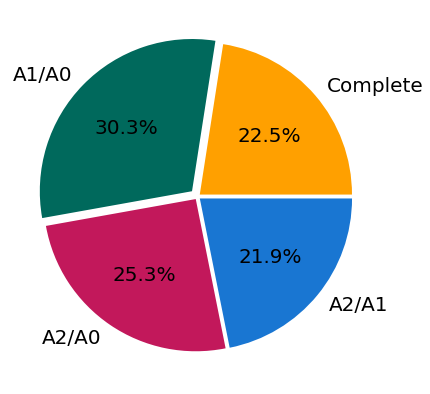

7311 17669 41.377553907974416


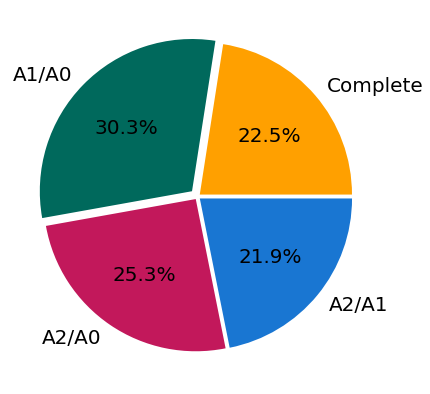

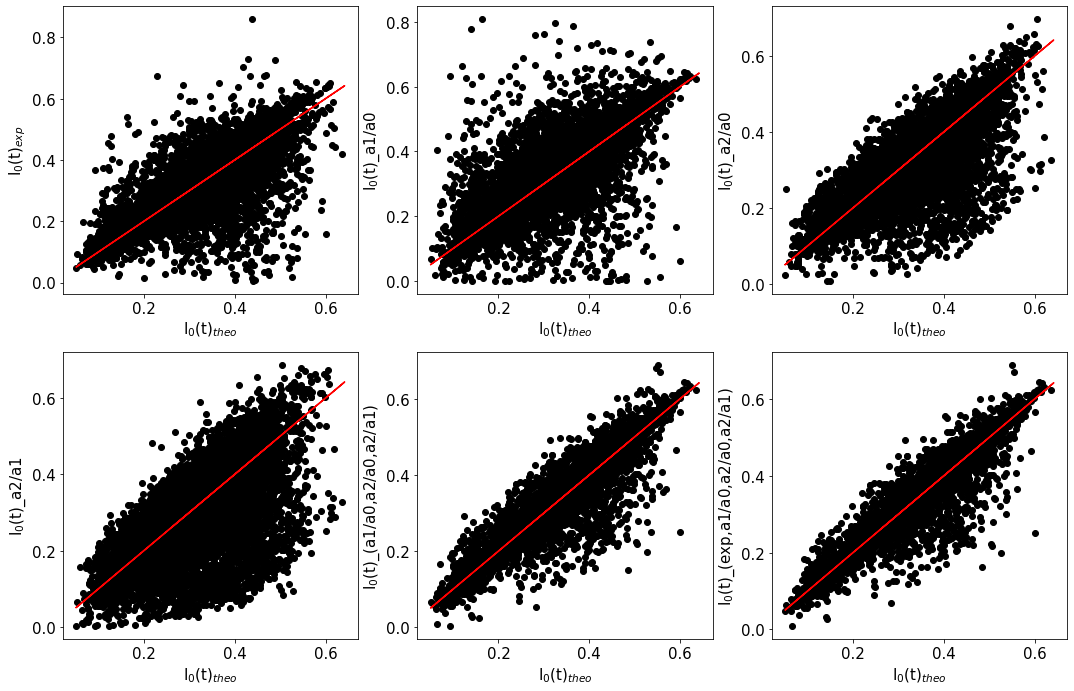

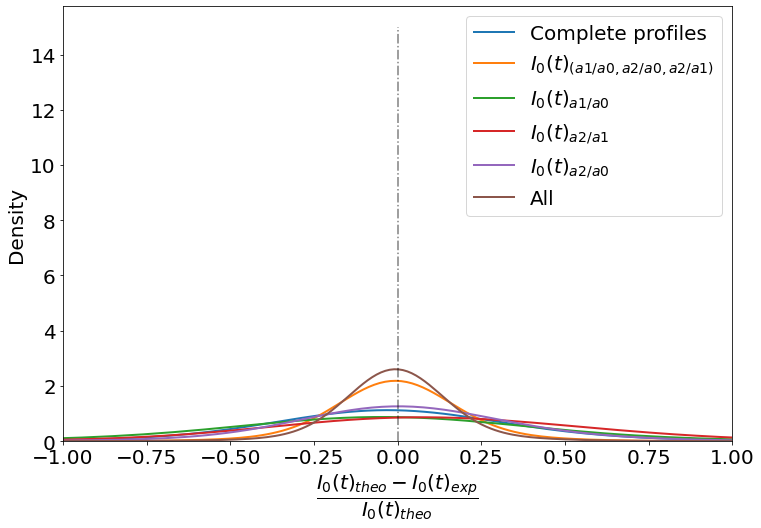

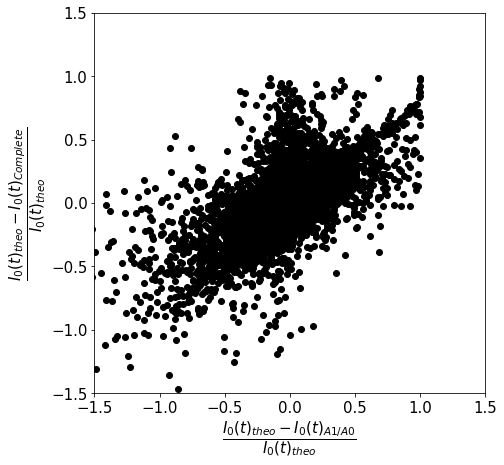

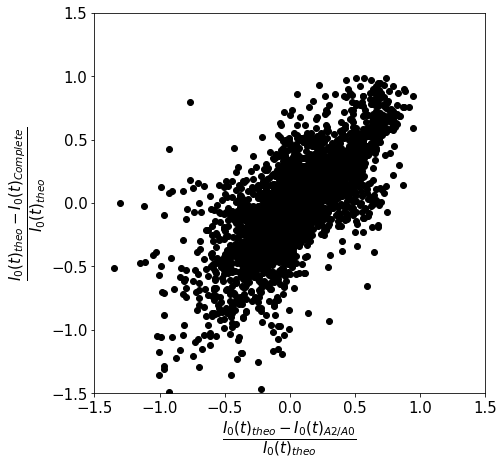

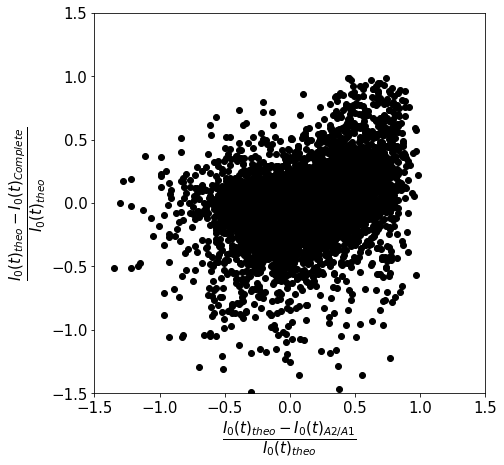

In [33]:
c_th=0.01
p_th=0.02

count=pd.DataFrame(temp[(temp.RMSE_compelete>c_th) &  
                        (temp.RMSE_first_three>p_th) ].groupby(by='sindex')['sindex'].count())
x=np.array(count).flatten()
# =======================
plt.figure(figsize=(7,7))
plt.rc('font', size=20) 
plt.pie(x,
        labels=[f'Complete',f'A1/A0',f'A2/A0',f'A2/A1'],
        autopct='%1.1f%%',
        explode=(0.02,0.05,0.02, 0.02), 
        colors = ['#FFA000','#00695C','#C2185B', '#1976D2'])
plt.show()

print(temp[(temp.RMSE_compelete>c_th)&  
           (temp.RMSE_first_three>p_th) ].shape[0],
      temp.shape[0],
      100*temp[(temp.RMSE_compelete>c_th) & 
               (temp.RMSE_first_three>p_th) ].shape[0]/temp.shape[0])

plot_scatter_comparision(temp[(temp.RMSE_compelete>c_th)&  (temp.RMSE_first_three>p_th)])